# Simpsons Haiku Demo 
## [@SimpsonsHaiku](https://twitter.com/SimpsonsHaiku)

For anyone who knows me, they'll attest that The Simpsons has had an undue impact on my life, being formative through my early years and enduring to the present moment. That contribution spanned curating a sense of humour deeply anchored in an appreciation for the surreal, a continued love of animation, or exposure to the depths of obscure Americana (thank you, John Swartwzelder).

This notebook demonstrates the implementation of an idea I had long ago, inspired by [@nythaikus](https://twitter.com/nythaikus). The dataset used here is hosted [on Kaggle here](https://www.kaggle.com/datasets/prashant111/the-simpsons-dataset), and was originally scraped by [Todd Schneider](https://toddwschneider.com/posts/the-simpsons-by-the-data/), covering the first 26 seasons. We start by loading the core haiku object, of class `SimpsonsHaiku`, and extracting a DataFrame of haikus.

In [1]:
import compuglobal
import matplotlib.pyplot as plt
from haiku import *

In [2]:
simpsons_haiku = SimpsonsHaiku()

100%|███████████████████████████████████████████████████████████████████████| 400929/400929 [00:06<00:00, 62003.62it/s]


In [3]:
script = simpsons_haiku.script

In [4]:
script.spoken_words.iloc[0]

'Ooo, careful, Homer.'

In [5]:
script[script.normalized_text.progress_apply(lambda x: 'diddly' in x)].iloc[0].values

100%|██████████████████████████████████████████████████████████████████████| 224803/224803 [00:00<00:00, 944564.00it/s]


array([25369, 86, 69,
       'Devil: Ahem! I hold here a contract between myself and one Homer Simpson, pledging me his soul for a donut. Which I delivered! And it was scrum-diddly-umptious!',
       378000, True, 346.0, 25.0, 'Devil', 'Simpson Living Room',
       'Ahem! I hold here a contract between myself and one Homer Simpson, pledging me his soul for a donut. Which I delivered! And it was scrum-diddly-umptious!',
       'ahem i hold here a contract between myself and one homer simpson pledging me his soul for a donut which i delivered and it was scrum-diddly-umptious',
       26.0, 86, 'Treehouse of Horror IV', 5, 5, 'Ahem', 1, 2],
      dtype=object)

In [6]:
corpus = script['spoken_words'].str.cat(sep=' ')
for char in [",", ".", "?", "!", ":", "\\", "\""]:#self.strip_list:
    corpus = corpus.replace(char, '')
corpus_list = corpus.lower().replace('-', ' ').replace('/', ' ').split(' ')

corpus_df = pd.DataFrame({'word' : corpus_list})

simpsons_count = corpus_df.value_counts().reset_index(name='counts')
simpsons_count

,word,counts
0,the,95570
1,i,81094
2,you,79830
3,a,72016
4,,71665
...,...,...
42120,street's,1
42121,hippity,1
42122,hippo's,1
42123,streamline,1


In [7]:
df = pd.read_json('simpson_lect.json', orient='index').reset_index().rename({'index':'word', 0:'n_syllable'}, axis=1)
df['syllables_estimate'] = df.word.apply(syllables.estimate)
df['syllapy_estimate'] = df.word.apply(syllapy.count)

df['syllables_error'] = abs(df.word.apply(syllables.estimate) - df['n_syllable'])
df['syllapy_error'] = abs(df.word.apply(syllapy.count) - df['n_syllable'])

In [8]:
# Comparing syllables and syllapy performance on labelled syllable set
df.describe().iloc[1:3, :]

,n_syllable,syllables_estimate,syllapy_estimate,syllables_error,syllapy_error
mean,1.913817,1.798906,1.673051,0.265390,0.300958
std,0.850117,0.828796,0.873396,0.573996,0.696163


In [9]:
# Generate haiku_df, will do so from scratch here but will load from path if it is passed when instantiating SimpsonsHaiku object
haiku_df = simpsons_haiku.generate_haiku_df(save=True)

100%|█████████████████████████████████████████████████████████████████████████| 30170/30170 [00:02<00:00, 14051.93it/s]


In [10]:
# Subsequent calls will use the object's already-defined `haiku_df` attribute
haiku, metadata = simpsons_haiku.generate_haiku()
print('{}, S{:02d}E{:02d}'.format(metadata['n_syllables'].values[0], metadata['season'].values[0], metadata['number_in_season'].values[0]))
print(haiku)

[17], S14E21
I hereby declare
this area cleaned up by
the Cavalry Kids


## Exploratory data analysis

Have you ever wondered which season of The Simpsons had the most haikus? How the average syllable-per-word count trended over the seasons? The maxiumum number of characters that contribute to a 17-syllable sequence of dialogue?  Well here's the notebook section for you!  

In [11]:
# Max number of lines of dialogue in a 17-syllable sequence? It's 16 (Lisa the Simpson)
haiku_df['n_lines'] = haiku_df.number.apply(len)
haiku_df[haiku_df.n_lines == haiku_df.n_lines.max()]

,id_x,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,id_y,title,season,number_in_season,spoken_words_split,number_in_line,n_syllables,n_lines
episode_id,,,,,,,,,,,,,,,,,,,,
353,"[101440, 101440, 101440, 101440, 101440, 10144...","[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 2...","[Homer Simpson: Wait. Yes, it's staying down. ...","[181000, 181000, 181000, 181000, 181000, 18100...","[True, True, True, True, True, True, True, Tru...","[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[Homer Simpson, Homer Simpson, Homer Simpson, ...","[Simpson Home, Simpson Home, Simpson Home, Sim...","[Wait. Yes, it's staying down. Oh no, it's not...",[wait yes its staying down oh no its not yes i...,"[27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27....","[353, 353, 353, 353, 353, 353, 353, 353, 353, ...",A Star Is Torn,16,18,No it's not Yep No Yep No Yep No Yep ...,"[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...","[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]",14


In [12]:
# Max number of unique characters in a 17-syllable sequence? It's Homer 3D in Treehouse of Horror VI, with 9 characters. Did anyone see the movie Tron?
haiku_df['n_characters'] = haiku_df.character_id.apply(lambda x: len(set(x)))
haiku_df[haiku_df.n_characters == haiku_df.n_characters.max()]

,id_x,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,...,word_count,id_y,title,season,number_in_season,spoken_words_split,number_in_line,n_syllables,n_lines,n_characters
episode_id,,,,,,,,,,,,,,,,,,,,,
134,"[38660, 38661, 38662, 38663, 38664, 38665, 386...","[223, 224, 225, 226, 227, 228, 229, 230, 231, ...","[Marge Simpson: No., Bart Simpson: No., Patty ...","[1105000, 1106000, 1106000, 1106000, 1107000, ...","[True, True, True, True, True, True, True, Tru...","[1.0, 8.0, 10.0, 71.0, 11.0, 22.0, 442.0, 140....","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[Marge Simpson, Bart Simpson, Patty Bouvier, C...","[Simpson Home, Simpson Home, Simpson Home, Sim...","[No., No., No., No., No., No., No., No., Yes. ...",...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, ...","[134, 134, 134, 134, 134, 134, 134, 134, 134, ...",Treehouse of Horror VI,7,6,No No No No No No No No Yes I mean no No Wel...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4]",12,9


In [13]:
# How about locations?
haiku_df['n_locations'] = haiku_df.location_id.apply(lambda x: len(set(x)))
haiku_df[haiku_df.n_locations == haiku_df.n_locations.max()]

,id_x,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,...,id_y,title,season,number_in_season,spoken_words_split,number_in_line,n_syllables,n_lines,n_characters,n_locations
episode_id,,,,,,,,,,,,,,,,,,,,,
53,"[16001, 16003, 16005, 16007, 16008]","[105, 107, 109, 111, 112]","[Apu Nahasapeemapetilon: (PLEASED, TO SELF) Oo...","[442000, 460000, 471000, 476000, 485000]","[True, True, True, True, True]","[208.0, 8.0, 90.0, 90.0, 91.0]","[136.0, 1.0, 585.0, 586.0, 586.0]","[Apu Nahasapeemapetilon, Bart Simpson, Eddie, ...","[Kwik-E-Mart, Street, Warehouse District, OUTD...","[Ooh, they used nylon rope this time. It feels...",...,"[53, 53, 53, 53, 53]",Separate Vocations,3,18,"Almost sensuous Oh, baby Damn boxes He's trap...","[3, 1, 1, 1, 1]","[5, 3, 3, 2, 4]",5,4,4
417,"[118649, 118652, 118654, 118656]","[215, 218, 220, 222]","[Cow In Truck: (ANNOYED GRUNT, THEN) I mean (P...","[1102000, 1107000, 1108000, 1110000]","[True, True, True, True]","[5188.0, 2.0, 2.0, 1.0]","[2231.0, 3421.0, 3422.0, 102.0]","[Cow In Truck, Homer Simpson, Homer Simpson, M...","[Rural Road, TRANSPORT VEHICLE, COW SUIT, Marg...","[I mean, Okay, they bought it., Have you got L...",...,"[417, 417, 417, 417]",Apocalypse Cow,19,17,"I mean Okay, they bought it Have you got Lou i...","[1, 1, 1, 1]","[2, 5, 7, 3]",4,3,4


Text(0.5, 1.0, 'Number of haikus per season')

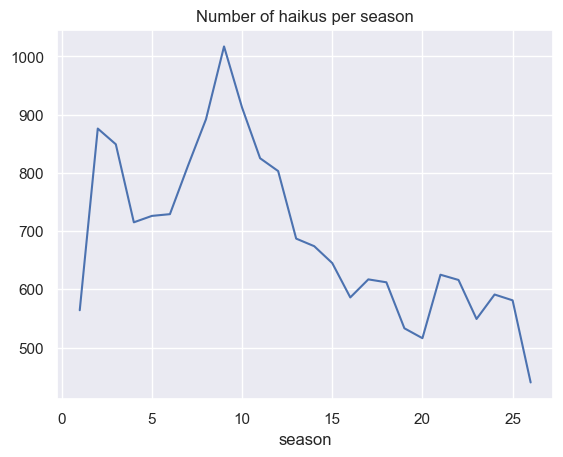

In [14]:
# Distribution by Season
import seaborn as sns
sns.set()

haiku_df.groupby('season').count()['id_x'].plot()
plt.title('Number of haikus per season')

Perhaps to your surprise, season 9 is off the charts in terms of haiku content. And there is an overall trend of haikus decreasing over the years. Who knew! Looking at the top episodes in terms of haiku count:

In [15]:
# Which episode(s) have the most haikus?
haiku_df.reset_index().groupby('episode_id')[['title', 'season', 'number_in_season']].value_counts().sort_values(ascending=False).head(20)

episode_id  title                                    season  number_in_season
203         Natural Born Kissers                     9       25                  60
14          Bart Gets an "F"                         2       1                   58
9           Life on the Fast Lane                    1       9                   58
129         Who Shot Mr. Burns? (Part Two)           7       1                   57
194         Dumbbell Indemnity                       9       16                  56
206         Bart the Mother                          10      3                   56
255         The Great Money Caper                    12      7                   55
33          The War of the Simpsons                  2       20                  55
24          One Fish, Two Fish, Blowfish, Blue Fish  2       11                  55
201         King of the Hill                         9       23                  54
228         Brother's Little Helper                  11      2                   5

In [16]:
# Which episode(s) have the least haikus?
haiku_df.reset_index().groupby('episode_id')[['title', 'season', 'number_in_season']].value_counts().sort_values(ascending=True).head(20)

episode_id  title                                              season  number_in_season
496         Politically Inept, with Homer Simpson              23      10                  14
107         Itchy & Scratchy Land                              6       4                   14
286         Gump Roast                                         13      17                  14
189         All Singing, All Dancing                           9       11                  14
337         All's Fair in Oven War                             16      2                   15
540         Married to the Blob                                25      10                  15
556         Treehouse of Horror XXV                            26      4                   15
568         Sky Police                                         26      16                  15
112         Homer Badman                                       6       9                   15
64          Treehouse of Horror III                            4  

b'Skipping line 8084: expected 13 fields, saw 20\nSkipping line 52607: expected 13 fields, saw 21\nSkipping line 59910: expected 13 fields, saw 21\n'
b'Skipping line 71801: expected 13 fields, saw 20\nSkipping line 73539: expected 13 fields, saw 21\nSkipping line 77230: expected 13 fields, saw 21\nSkipping line 78953: expected 13 fields, saw 21\nSkipping line 81138: expected 13 fields, saw 20\nSkipping line 86746: expected 13 fields, saw 22\nSkipping line 101154: expected 13 fields, saw 21\nSkipping line 115438: expected 13 fields, saw 20\nSkipping line 117573: expected 13 fields, saw 22\nSkipping line 130610: expected 13 fields, saw 22\n'
b'Skipping line 152970: expected 13 fields, saw 22\nSkipping line 153017: expected 13 fields, saw 20\nSkipping line 153018: expected 13 fields, saw 30\nSkipping line 154080: expected 13 fields, saw 20\nSkipping line 154082: expected 13 fields, saw 20\nSkipping line 154084: expected 13 fields, saw 20\nSkipping line 154086: expected 13 fields, saw 20\n

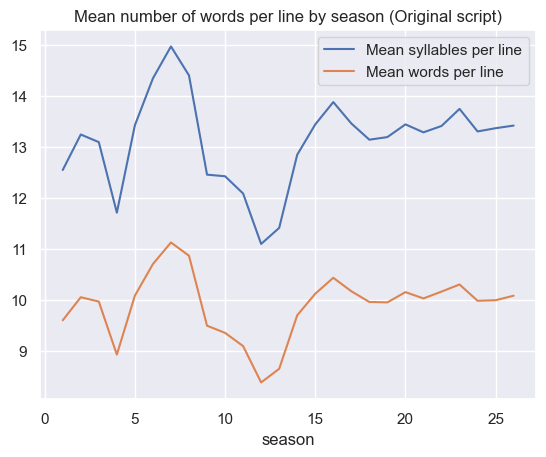

In [17]:
base_script = pd.read_csv('dataset/simpsons_script_lines.csv', error_bad_lines=False).dropna(subset=['word_count'])
episode_data = pd.read_csv('dataset/simpsons_episodes.csv')[['id', 'title', 'season', 'number_in_season']]
base_script = pd.merge(base_script, episode_data, how='left', left_on='episode_id', right_on='id')

base_script['n_syllables'] = base_script.spoken_words.progress_apply(simpsons_haiku.count_syllables_line)
base_script.groupby('season')['n_syllables'].mean().plot(label='Mean syllables per line')
base_script.groupby('season')['word_count'].mean().plot(label='Mean words per line')

plt.title('Mean number of words per line by season (Original script)')
plt.legend()

<AxesSubplot:title={'center':'Mean number of syllables per word by season'}, xlabel='season'>

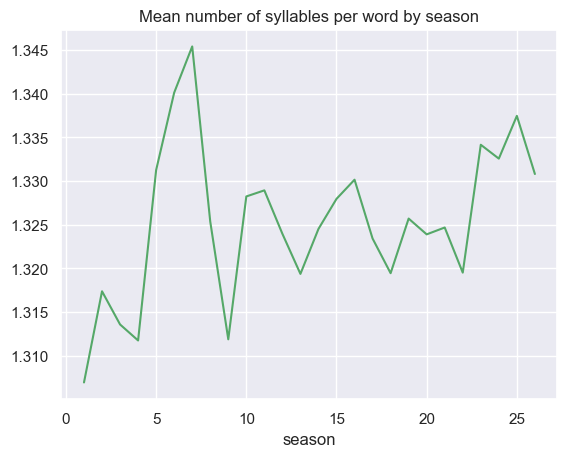

In [18]:
# This the ratio of the two lines above
plt.title('Mean number of syllables per word by season')
(base_script.groupby('season')['n_syllables'].sum() / base_script.groupby('season')['word_count'].sum()).plot(color='g')

In [19]:
# Distribution of haikus by syllable count of constituent diaglogue lines
haiku_df.n_syllables.value_counts().head(30)

[17]          1654
[9, 8]         468
[5, 12]        453
[8, 9]         429
[10, 7]        429
[7, 10]        413
[12, 5]        399
[11, 6]        371
[4, 13]        336
[6, 11]        299
[3, 14]        235
[13, 4]        228
[15, 2]        203
[2, 15]        195
[14, 3]        192
[5, 7, 5]      144
[16, 1]        134
[1, 16]        114
[5, 6, 6]      109
[5, 5, 7]      109
[7, 5, 5]      104
[5, 4, 8]       97
[4, 8, 5]       94
[4, 6, 7]       93
[8, 4, 5]       90
[4, 7, 6]       88
[6, 6, 5]       88
[4, 5, 8]       88
[7, 4, 6]       82
[10, 2, 5]      74
Name: n_syllables, dtype: int64

In [20]:
haiku_df.n_syllables.value_counts().reset_index()[haiku_df.n_syllables.value_counts().reset_index()['index'].apply(lambda x: x[0] == 5 or x[-1] == 5)]

,index,n_syllables
2,"[5, 12]",453
6,"[12, 5]",399
15,"[5, 7, 5]",144
18,"[5, 6, 6]",109
19,"[5, 5, 7]",109
...,...,...
2670,"[2, 2, 2, 1, 5, 5]",1
2673,"[2, 1, 1, 4, 4, 5]",1
2678,"[1, 2, 5, 4, 5]",1
2681,"[5, 2, 2, 2, 2, 2, 1, 1]",1


## Generating haikus
This section generates haikus, demonstrating the usage of the `syllable_patterns` and `golden_age` parameters.

In [21]:
# Higher quality haikus
haiku, metadata = simpsons_haiku.generate_haiku(syllable_patterns=[[5,7,5], [17], [5, 12], [12, 5]], golden_age=True)
print('{}, S{:02d}E{:02d}'.format(metadata['n_syllables'].values[0], metadata['season'].values[0], metadata['number_in_season'].values[0]))
print(haiku)

[12, 5], S06E03
I mean it was it
was a beautiful evening
Let's not ruin it


In [22]:
# Medium quality? Two line breaks
haiku, metadata = simpsons_haiku.generate_haiku(syllable_patterns=[[9, 8], [8, 9], [10, 7], [7, 10]])
print('{}, S{:02d}E{:02d}'.format(metadata['n_syllables'].values[0], metadata['season'].values[0], metadata['number_in_season'].values[0]))
print(haiku)

[9, 8], S06E21
but we don't have that
kind of money In fact no
school could afford to


In [23]:
# Lower quality haikus
haiku, metadata = simpsons_haiku.generate_haiku(syllable_patterns=[[5, 5, 7]])
print('{}, S{:02d}E{:02d}'.format(metadata['n_syllables'].values[0], metadata['season'].values[0], metadata['number_in_season'].values[0]))
print(haiku)

[5, 5, 7], S24E04
THE EGG IN MY CREAM
YEAH YOU KNOCK ME OUT THEN YOU'RE
THE GIRL OF MY DREAMS


## Appendix

This section demonstrates some the functionality associated with the SimpsonsTwitterBot class, particularly querying GIFs from the Frinkiac API via the package `compuglobal`, as well as debugging.

In [24]:
from twitter import SimpsonsTwitterBot

# Generate frinkiac gifs and images from a haiku - S4E17 Last Exit to Springfield
haiku_query = """It doesn't take a
                 whiz to see that you're looking 
                 out for number one"""

simpsons_bot = SimpsonsTwitterBot(
        auth_dict=json.load(open('auth.json')), 
        haiku_df='haiku_df.csv'
    )

image_url, meme_url, gif_url, mp4_url = simpsons_bot.search_frinkiac(haiku_query, episode_key='S04E17')

In [25]:
import compuglobal 
simpsons = compuglobal.Frinkiac()


episode_key = 'S{:02d}E{:02d}'.format(metadata['season'].values[0], metadata['number_in_season'].values[0])

gif_url, image_url = None, None
search_results = simpsons.search(haiku)
for result in search_results:
    if result.key == episode_key:
        screencap = simpsons.get_screencap(result.key, 
                                           result.timestamp)
        image_url = screencap.get_image_url()
        gif_url = screencap.get_gif_url()
        
        break

In [26]:
image_url

In [27]:
gif_url

In [28]:
mp4_url

'https://frinkiac.com/mp4/S04E17/824156/831046.mp4?b64lines=IEFORCBJIFdBTlQgVE8gVEFLRSBUSEUKIFBSRVNTVVJFIE9GRi4='

In [ ]:
# Check syllable counts
for word in "DR ZAIUS DR ZAIUS".split():
    print(word, simpsons_haiku.num_syllables(word))

In [30]:
# Search script for line - used in debugging
def fun(x):
    if isinstance(x, float):
        return False
    else:
        return 'What was I think' in x
    
base_script[base_script.spoken_words.apply(fun)].spoken_words.values

array(['Man, look at all the crap with my face on it. "Krusty\'s Personal Swabs?" What was I thinkin\'? All these years I shoulda been workin\' on my act, but I was too busy sellin\' out. Now I\'m just a tired old hack.',
       "I don't know. I think this movie was a big mistake. All I do is talk for two hours. I don't shoot anybody! What was I thinking?!",
       'What was I thinking, trying to feel alive? Forget that!',
       'Why did I do that? / It sounds so dull and boring. / What was I thinking?'],
      dtype=object)

In [31]:
haiku_df[haiku_df.season < 9].iloc[-2].spoken_words_split

' And as you go forth today, remember always, your duty is clear'

In [ ]:
haiku_df[haiku_df.title == "Mr Plow"][['spoken_words_split', 'n_syllables']].values